In [58]:
import random

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import datasets
import scipy.cluster.hierarchy as hac

import pandas as pd
# import seaborn as sb


In [2]:
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

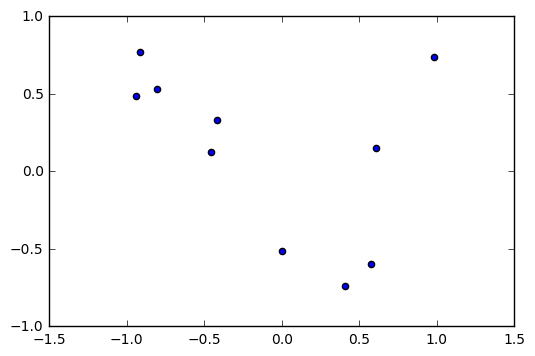

In [3]:
x_norm = init_board(10)
plt.scatter(x_norm[:, 0], x_norm[:, 1])


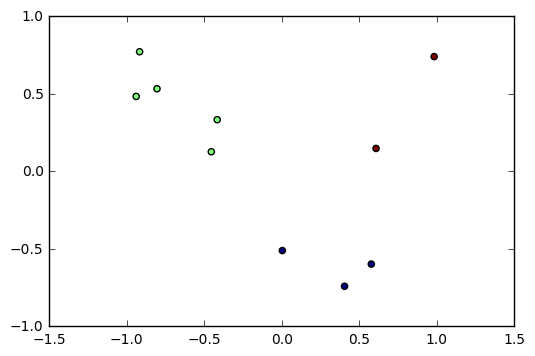

In [4]:
tester_norm=KMeans(n_clusters=3)
tester_norm.fit(x_norm)
labels_norm = tester_norm.labels_
plt.scatter(x_norm[:, 0], x_norm[:, 1], c=labels_norm.astype(np.float))

In [7]:
print tester_norm.labels_

[1 0 0 0 1 2 1 1 2 1]


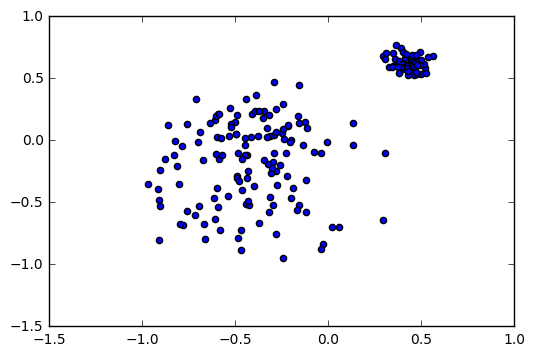

In [23]:
x_gauss = init_board_gauss(N=200, k=3)
plt.scatter(x_gauss[:, 0], x_gauss[:, 1])


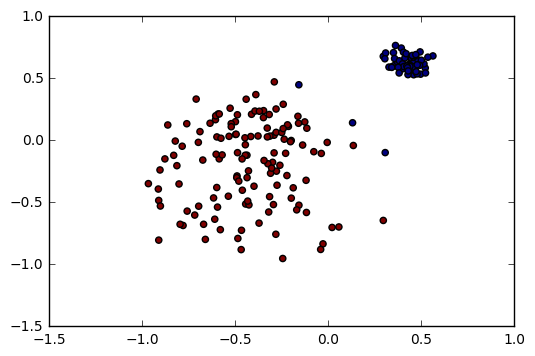

In [116]:
def k_cluster( data, n= 2):
    tester=KMeans(n_clusters=n)
    tester.fit(data)
    labels = tester.labels_
    plt.scatter(data[:, 0], data[:, 1], c=labels.astype(np.float))

k_cluster(x_gauss)

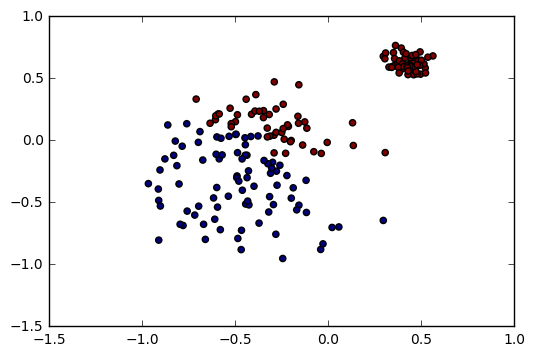

In [114]:
def agg_cluster (data, affinity = "euclidean", linkage = "complete", n = 2):
    # Affinity = {“euclidean”, “l1”, “l2”, “manhattan”,
    # “cosine”}
    # Linkage = {“ward”, “complete”, “average”}
    Hclustering = AgglomerativeClustering(n_clusters=n, affinity=affinity, linkage=linkage)
    Hclustering.fit(data)
    # ms = np.column_stack((ground_truth, Hclustering.labels_))
    # df = pd.DataFrame(ms,columns = ['Ground truth','Clusters'])
    # pd.crosstab(df['Ground truth'], df['Clusters'],margins=True)
    labels = Hclustering.labels_
    plt.scatter(data[:, 0], data[:, 1], c=labels.astype(np.float))
agg_cluster(x_gauss)

In [90]:
# Kx = tester_gauss.cluster_centers_
# Kx_mapping = {case:cluster for case, cluster in enumerate(tester_gauss.labels_)}
# Hclustering = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
# Hclustering.fit(Kx)

# labels_gauss = Hclustering.labels_
# print labels_gauss
# # plt.scatter(x_gauss[:, 0], x_gauss[:, 1], c=labels_gauss.astype(np.float))

In [91]:
#Hierachal example
import numpy as np
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

def test_clusters(data):

    fig, axes23 = plt.subplots(2, 3)

    for method, axes in zip(['single', 'complete'], axes23):
        z = hac.linkage(data, method=method)

        # Plotting
        axes[0].plot(range(1, len(z)+1), z[::-1, 2])
        knee = np.diff(z[::-1, 2], 2)
#         print knee
        axes[0].plot(range(2, len(z)), knee)

        num_clust1 = knee.argmax() + 2
        knee[knee.argmax()] = 0
        num_clust2 = knee.argmax() + 2

        axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- elbow point')

        part1 = hac.fcluster(z, num_clust1, 'maxclust')
        part2 = hac.fcluster(z, num_clust2, 'maxclust')


        clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
        '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']

        for part, ax in zip([part1, part2], axes[1:]):
            for cluster in set(part):
                ax.scatter(data[part == cluster, 0], data[part == cluster, 1], 
                           color=clr[cluster])

        m = '\n(method: {})'.format(method)
        plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
                 ylabel='{}\ncluster distance'.format(m))
        plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
        plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

    plt.tight_layout()
    plt.show()

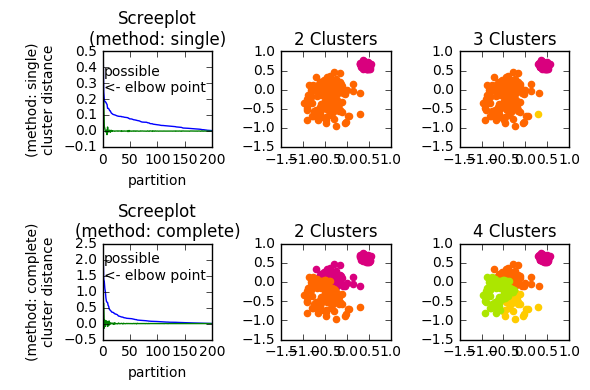

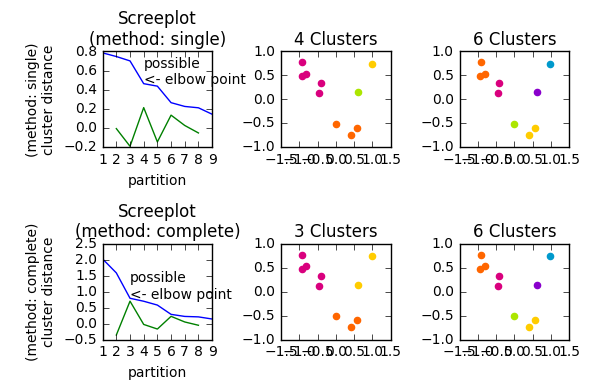

In [146]:
test_clusters(x_gauss)
test_clusters(x_norm)

In [133]:
import datetime
funun=pd.read_csv("test.csv", parse_dates = ["Date", "DOB"])
funun['DOB'] = funun["DOB"].astype(np.int64)#.astype(datetime.datetime)
funun["Date"] = funun["Date"].astype(np.int64)#.astype(datetime.datetime)
funun.sample(n=5)

,Unnamed: 0,FName,LName,City,DOB,Platform,Title,Date,Decade,Year,used,new,ini_newused
7253,10134,Jason,McDonald,Logan,5097600000000000,Game Cube,Mortal Kombat Deadly Alliance,1080655475000000000,1970.0,1970.0,19.99,0.00,19
250831,358495,Rick,Durrant,cove,-268790400000000000,WII,Monster 4x4:World Circuit,1292666663000000000,1960.0,1961.0,9.99,14.99,19
309022,438909,Janet,Hall,Logan,106272000000000000,X-box,Cabela's Outdoor Adventures,1373037142000000000,1970.0,1973.0,14.99,19.99,19
6453,9053,alan,vankirk,chubbuck,2920924800000000000,Game Cube,Mary Kate & Ashley:Sweet 16,1453912448000000000,2060.0,2062.0,9.99,19.99,19
251983,360174,Dawn,Webber,Logan,56592000000000000,WII,System w/o WII Sports,1313835677000000000,1970.0,1971.0,79.99,179.99,19


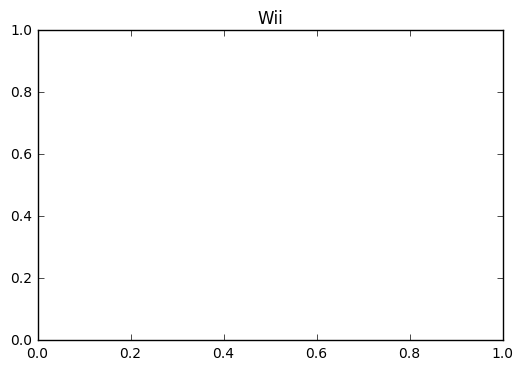

In [151]:
p1 = funun[funun["Platform"] == "WII"]
p2= pd.concat([p1['Decade'], p1['used']], axis=1)
lst=np.array([x for x in p2.values])



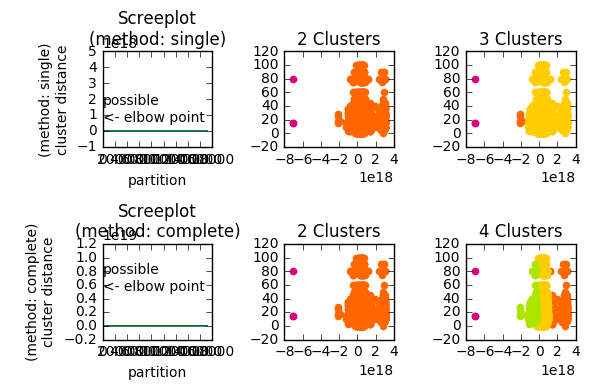

In [142]:

test_clusters(lst)

None
None


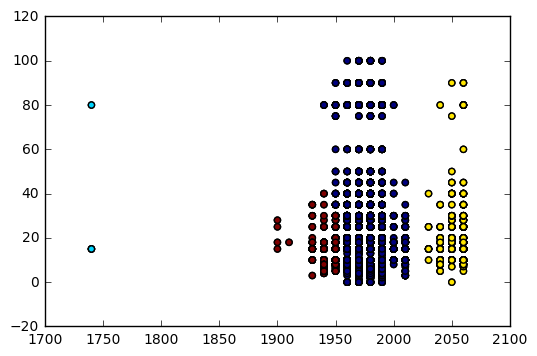

In [150]:
k_cluster(lst, n = 3)

In [ ]:
agg_cluster(data=lst, n=4)